In [1]:
import pandas as pd
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.cross_validation import train_test_split


pd.options.mode.chained_assignment = None  # default='warn'


train_list = ['180828', '180829', '180830', '180831', '180901', '180902', '180903', '180904', '180905',\
          '180906', '180907', '180908', '180909', '180910', '180911', '180912', '180913', '180914', '180915',\
          '180916', '180917', '180918', '180919', '180920', '180921', '180922', '180923', '180924', '180925', \
          '180926', '180927', '180928', '180929', '180930', '181001', '181002', '181003', '181004', '181005', \
          '181006', '181007', '181008', '181009', '181010', '181011', '181012', '181013', '181014', '181015', \
           '181016', '181017', '181018', '181019', '181020', '181021',\
           '181022', '181023', '181024', '181025', '181026', '181027', '181028', '181029','181101',\
             '181030','181031','181101' ]

valid_list = ['181102','181103','181104','181105', '181106', '181107', '181108', '181109','181110']


day_all = ['180531','180602', '180603', '180604', '180605', '180606', '180607', '180608', '180609', '180610',\
           '180611', '180612', '180613', '180614', '180615', '180616', '180617', '180618', '180619', '180620',\
           '180621', '180622', '180623', '180624', '180625', '180626', '180627', '180628', '180629', '180630',\
           '180701', '180702', '180703', '180704', '180705', '180706', '180707', '180708', '180709', '180710', \
           '180711', '180712', '180713', '180714', '180715',\
           '180716', '180717', '180718', '180719', '180720', '180721', '180722', '180723', '180724', '180725',\
           '180726', '180727', '180728', '180729', '180730', '180731', '180801', '180802', '180803', '180804',\
           '180805', '180806', '180807', '180808', '180809', '180810', '180811', '180812', '180813', '180814',\
           '180815', '180816', '180817', '180818', '180819', '180820', '180821', '180822', \
            '180828', '180829', '180830', '180831', '180901', '180902', '180903', '180904', '180905',\
           '180906', '180907', '180908', '180909', '180910', '180911', '180912', '180913', '180914', '180915',\
           '180916', '180917', '180918', '180919', '180920', '180921', '180922', '180923', '180924', '180925', \
            '180926', '180927', '180928', '180929', '180930', '181001', '181002', '181003', '181004', '181005', \
           '181006', '181007', '181008', '181009', '181010', '181011', '181012', '181013', '181014', '181015', \
           '181016', '181017', '181018', '181019', '181020', '181021','181022',\
            '181022', '181023', '181024', '181025', '181026', '181027', '181028', '181029', '181030', \
           '181031', '181101', '181102', '181103', '181104', '181105', '181106', '181107', '181108', '181109',\
           '181110', '181111']

c:\program files\python3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:

# 划分训练集， 验证集 测试集
str_cols = ['order_id','job_name',\
            'start_time','end_time',\
            'day_0_bef_end_time']
features_all_merge = pd.read_csv('edt_no_upjob_score1120.csv')
features_all_merge = features_all_merge['feature'][:200]
#read_cols = list(set(str_cols+features_all))
read_cols = list(set(str_cols+list(features_all_merge)))

# read_cols = [cl for cl in read_cols if cl not in del_cols]

train_df = []
n_i = 1  #选取第几轮数据切片
#
for day in train_list:
    day_all_data = pd.read_csv(r'E:\jupyter\CTM\data_train\dt_no_upjob_train\no_up_%s.csv'%day,nrows=10000,usecols=read_cols)
    
    day_all_data = day_all_data[day_all_data.job_name.notnull()]


    #过滤结束日期超过2天的
    #print(day_all_data.shape)
    day_after_2 = day_all[day_all.index(day)+1]
    day_after_2_int = int('20'+day_after_2+'235959')
    day_all_data = day_all_data[day_all_data.end_time<day_after_2_int]

    train_df.append(day_all_data)
    print(day,end=' ')
    
train = pd.concat(train_df, ignore_index=True)


valid_df = []
for day in valid_list:
    print(day,end=' ')
    if day >='181105':
        day_all_data = pd.read_csv(r'E:\jupyter\CTM\data_train\dt_no_upjob_train\no_up_%s.csv'%day,nrows=40000,usecols=read_cols)
    else:
        day_all_data = pd.read_csv(r'E:\jupyter\CTM\data_train\dt_no_upjob_train\no_up_%s.csv'%day,nrows=10000,usecols=read_cols)
    day_all_data = day_all_data[day_all_data.job_name.notnull()]
    day_after_2 = day_all[day_all.index(day)+1]
    day_after_2_int = int('20'+day_after_2+'235959')
    day_all_data = day_all_data[day_all_data.end_time<day_after_2_int]
    
    print(day_all_data.shape)
    valid_df.append(day_all_data)
    
valid = pd.concat(valid_df, ignore_index=True)


print('\n')
print(train.shape)
print(valid.shape)

180828 180829 180830 180831 180901 180902 180903 180904 180905 180906 180907 180908 180909 180910 180911 180912 180913 180914 180915 180916 180917 180918 180919 180920 180921 180922 180923 180924 180925 180926 180927 180928 180929 180930 181001 181002 181003 181004 181005 181006 181007 181008 181009 181010 181011 181012 181013 181014 181015 181016 181017 181018 181019 181020 181021 181022 181023 181024 181025 181026 181027 181028 181029 181101 181030 181031 181101 181102 (4732, 205)
181103 (5467, 205)
181104 (4734, 205)
181105 (13403, 205)
181106 (12966, 205)
181107 (10629, 205)
181108 (9232, 205)
181109 (7250, 205)
181110 (5409, 205)


(322799, 205)
(73822, 205)


In [3]:
cols_train =[clm for clm in valid.columns if clm not in ['order_id','job_name','v_date','order_d','from_time_1000_start',\
                                                            'start_time','end_time','order_id','job_name','day_0_bef_start_time',\
                                                            'day_0_bef_end_time','day_bef_0_dt','no_up_job_name']]


valid_x = valid[cols_train]
valid_y = valid['day_0_bef_end_time']

train_x,test_x,train_y,test_y = train_test_split(train[cols_train],train['day_0_bef_end_time'],random_state=33,test_size=0.1)

# train_y = train_y.fillna(train_y.mean())
# valid_y = valid_y.fillna(valid_y.mean())
# test_y = test_y.fillna(test_y.mean())  

print(train_x.shape)
print(test_x.shape)
print(valid_x.shape)

(290519, 200)
(32280, 200)
(73822, 200)


In [8]:
#基准
#查看 end_time 和day_1_7_bef_end_time_median  day_1_7_bef_end_time_mean day_1_14_bef_end_time_mean
valid_list =[ '181102','181103','181104','181105', '181106', '181107', '181108', '181109','181110']
for day in valid_list:
    print(day,end=' ')
    day_all_data = pd.read_csv(r'E:\jupyter\CTM\data_train\dt_no_upjob_train\no_up_%s.csv'%day)

    day_after_2 = day_all[day_all.index(day)+1]
    day_after_2_int = int('20'+day_after_2+'045959')
    day_all_data = day_all_data[day_all_data.end_time<day_after_2_int]
    
    print(day_all_data.shape)
    
    
    print('The MAE of valid_data is:', mean_absolute_error(day_all_data['day_0_bef_end_time'], day_all_data['day_1_14_bef_end_time_median']))

    print('The MSE of  valid_data is:', mean_squared_error(day_all_data['day_0_bef_end_time'],day_all_data['day_1_14_bef_end_time_median']))

181102 (31714, 313)
The MAE of valid_data is: 111.698713502
The MSE of  valid_data is: 48176.1133569
181103 (35397, 313)
The MAE of valid_data is: 324.597790773
The MSE of  valid_data is: 235901.843292
181104 (31601, 313)
The MAE of valid_data is: 92.5683048005
The MSE of  valid_data is: 44176.2810829
181105 (22188, 313)
The MAE of valid_data is: 87.4907157022
The MSE of  valid_data is: 29200.6994321
181106 (21510, 313)
The MAE of valid_data is: 77.3143189214
The MSE of  valid_data is: 30423.8420967
181107 (17443, 313)
The MAE of valid_data is: 82.6108180932
The MSE of  valid_data is: 37022.9119848
181108 (15151, 313)
The MAE of valid_data is: 88.3378984885
The MSE of  valid_data is: 45416.0040096
181109 (12232, 313)
The MAE of valid_data is: 137.647400262
The MSE of  valid_data is: 101211.173357
181110 (9158, 313)
The MAE of valid_data is: 183.721008954
The MSE of  valid_data is: 157684.429624


In [8]:
# lightgbm 算法预测 全部特征
import json
import lightgbm as lgb


y_train = train_y.values
y_test = test_y.values

X_train = train_x.values
X_test = test_x.values
# X_train = train_x[features].values
# X_test = test_x[features].values
# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train,silent=True)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)


# specify your configurations as a dict
params = {'task': 'train',
   'boosting_type': 'gbdt',
   'objective': 'regression',
   'metric':  'l2',
   'num_leaves': 2**2,
   'learning_rate': 0.1,
   'feature_fraction': 0.9,
   'bagging_fraction': 0.9,
   'bagging_freq': 5,
   'verbose': 50,
    'verbose_eval':50}
  
print('Start training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=100,
                valid_sets=lgb_eval,
                early_stopping_rounds=10,
                verbose_eval=False)

# print('Save model...')

# # save model to file
# from sklearn.externals import joblib
# joblib.dump(gbm,'edt_gbm.pkl')
# clf = joblib.load("edt_gbm.pkl")

# gbm.save_model('lightgbm_model_edt.txt')
print('Start predicting...')


# predict

y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
vlid_pred = gbm.predict(valid_x, num_iteration=gbm.best_iteration)
#clf_pred = gbm.predict(valid_x, num_iteration=gbm.best_iteration)
# eval print(y_pred)
print('The MAE of prediction train_data is:', mean_absolute_error(y_test, y_pred))
print('The MAE of prediction valid_data is:', mean_absolute_error(valid_y, vlid_pred))
# print('The mean_absolute_error of prediction valid_data is:', mean_absolute_error(valid_y, clf_pred))
print('The MSE of prediction train_data is:', mean_squared_error(y_test, y_pred))
print('The MSE of prediction valid_data is:', mean_squared_error(valid_y, vlid_pred))


Start training...
Start predicting...
The MAE of prediction train_data is: 116.685153716
The MAE of prediction valid_data is: 119.085381052
The MSE of prediction train_data is: 44025.9420994
The MSE of prediction valid_data is: 57407.170969


In [21]:
#测试选取多少迭代次数合适：
x_list = []

test_mse = []
valid_mse = []

for i in range(1,8):
    print(i,end=' ')
    x_list.append(i)
    features = features_all_merge[:95]

    X_train = train_x[features].values
    X_test = test_x[features].values
    
    lgb_train = lgb.Dataset(X_train, y_train,silent=True)
    lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)


# specify your configurations as a dict
    params = {'task': 'train',
       'boosting_type': 'gbdt',
       'objective': 'regression',
       'metric':  'l2',
       'num_leaves': 2**i,
       'learning_rate': 0.1,
       'feature_fraction': 0.9,
       'bagging_fraction': 0.9,
       'bagging_freq': 5,
       'verbose': 50,
        'verbose_eval':50}

    #print('Start training...')
    # train
    gbm = lgb.train(params,
                    lgb_train,
                    num_boost_round=100,
                    valid_sets=lgb_eval,
                    early_stopping_rounds=10,
                    verbose_eval=False)

    # print('Save model...')

    #print('Start predicting...')


    # predict

    y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
    vlid_pred = gbm.predict(valid_x[features], num_iteration=gbm.best_iteration)
    
    
    test_mse.append(mean_squared_error(y_test, y_pred))
    valid_mse.append(mean_squared_error(valid_y, vlid_pred))

1 2 3 4 5 6 7 

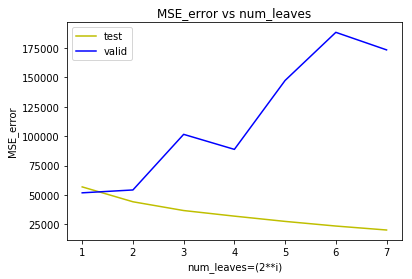

In [22]:
import matplotlib.pyplot as plt

plt.plot(x_list,test_mse,'y',label='test')
plt.plot(x_list,valid_mse,'b',label='valid')
plt.ylabel('MSE_error')
plt.xlabel('num_leaves=(2**i)')
plt.title('MSE_error vs num_leaves')
plt.legend()
plt.show()

In [19]:
#测试选取多少特征合适：
x_list = []

test_mse = []
valid_mse = []

for i in range(50,200):
    print(i,end=' ')
    x_list.append(i)
    features = features_all_merge[:i]

    X_train = train_x[features].values
    X_test = test_x[features].values
    
    lgb_train = lgb.Dataset(X_train, y_train,silent=True)
    lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)


# specify your configurations as a dict
    params = {'task': 'train',
       'boosting_type': 'gbdt',
       'objective': 'regression',
       'metric':  'l2',
       'num_leaves': 2**2,
       'learning_rate': 0.1,
       'feature_fraction': 0.9,
       'bagging_fraction': 0.9,
       'bagging_freq': 5,
       'verbose': 50,
        'verbose_eval':50}

    #print('Start training...')
    # train
    gbm = lgb.train(params,
                    lgb_train,
                    num_boost_round=26,
                    valid_sets=lgb_eval,
                    early_stopping_rounds=10,
                    verbose_eval=False)

    # print('Save model...')

    #print('Start predicting...')


    # predict

    y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
    vlid_pred = gbm.predict(valid_x[features], num_iteration=gbm.best_iteration)
    
    
    test_mse.append(mean_squared_error(y_test, y_pred))
    valid_mse.append(mean_squared_error(valid_y, vlid_pred))

50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 

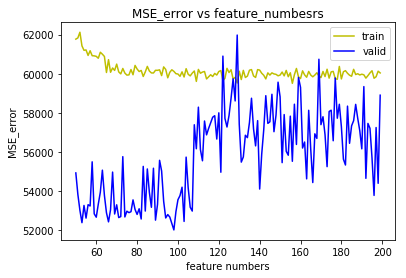

In [20]:
import matplotlib.pyplot as plt

plt.plot(x_list,test_mse,'y',label='train')
plt.plot(x_list,valid_mse,'b',label='valid')
plt.ylabel('MSE_error')
plt.xlabel('feature numbers')
plt.title('MSE_error vs feature_numbesrs')
plt.legend()
plt.show()

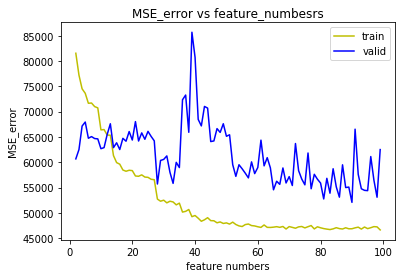

In [16]:
import matplotlib.pyplot as plt

plt.plot(x_list,test_mse,'y',label='train')
plt.plot(x_list,valid_mse,'b',label='valid')
plt.ylabel('MSE_error')
plt.xlabel('feature numbers')
plt.title('MSE_error vs feature_numbesrs')
plt.legend()
plt.show()

In [25]:
#测试选取多少迭代次数合适：
x_list = []

test_mse = []
valid_mse = []

for i in range(3,100):
    print(i,end=' ')
    x_list.append(i)
    features = features_all_merge[:95]

    X_train = train_x[features].values
    X_test = test_x[features].values
    
    lgb_train = lgb.Dataset(X_train, y_train,silent=True)
    lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)


# specify your configurations as a dict
    params = {'task': 'train',
       'boosting_type': 'gbdt',
       'objective': 'regression',
       'metric':  'l2',
       'num_leaves': 2**2,
       'learning_rate': 0.1,
       'feature_fraction': 0.9,
       'bagging_fraction': 0.9,
       'bagging_freq': 5,
       'verbose': 50,
        'verbose_eval':50}

    #print('Start training...')
    # train
    gbm = lgb.train(params,
                    lgb_train,
                    num_boost_round=i,
                    valid_sets=lgb_eval,
                    early_stopping_rounds=10,
                    verbose_eval=False)

    # print('Save model...')

    #print('Start predicting...')


    # predict

    y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
    vlid_pred = gbm.predict(valid_x[features], num_iteration=gbm.best_iteration)
    
    
    test_mse.append(mean_squared_error(y_test, y_pred))
    valid_mse.append(mean_squared_error(valid_y, vlid_pred))

3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

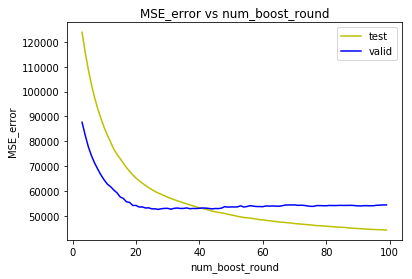

In [26]:
import matplotlib.pyplot as plt

plt.plot(x_list,test_mse,'y',label='test')
plt.plot(x_list,valid_mse,'b',label='valid')
plt.ylabel('MSE_error')
plt.xlabel('num_boost_round')
plt.title('MSE_error vs num_boost_round')
plt.legend()
plt.show()

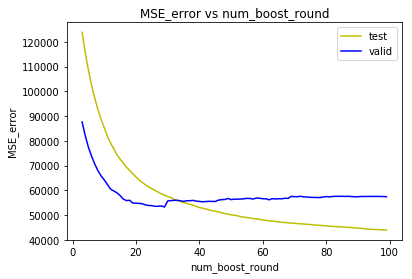

In [13]:
import matplotlib.pyplot as plt

plt.plot(x_list,test_mse,'y',label='test')
plt.plot(x_list,valid_mse,'b',label='valid')
plt.ylabel('MSE_error')
plt.xlabel('num_boost_round')
plt.title('MSE_error vs num_boost_round')
plt.legend()
plt.show()

In [27]:
for i,er in zip(x_list,valid_mse):
    print(i,er)

3 87651.0120869
4 82387.0858032
5 77677.9521925
6 74076.6592071
7 71113.3603998
8 68655.5792808
9 66332.0903812
10 64388.3428727
11 62710.6105833
12 61719.8530516
13 60373.8673965
14 59269.2850642
15 57596.8462907
16 56985.7316886
17 55620.2441896
18 55375.4042343
19 54139.0383612
20 54166.7911521
21 53524.5871675
22 53560.4867239
23 53133.9630409
24 53198.0254763
25 52791.5567012
26 52797.9973908
27 52574.1990169
28 52826.3597031
29 52980.1886714
30 52985.2033515
31 52659.0589855
32 52982.0123701
33 53115.7834819
34 52939.5758983
35 52971.5658574
36 53156.5339947
37 52846.1426164
38 52947.0786726
39 52920.1754299
40 53012.0999305
41 53131.6293292
42 53077.9363646
43 52958.0515478
44 52766.4994509
45 52927.0419379
46 52888.537108
47 53082.2037441
48 53668.6319977
49 53478.2097908
50 53567.6559363
51 53536.9161039
52 53578.5755035
53 54001.3122548
54 53529.857369
55 53716.4535688
56 54076.1084941
57 53880.6638289
58 53726.4035047
59 53705.2656675
60 53659.7915769
61 53938.7736088
62 539

In [5]:
# lightgbm 算法预测
import json
import lightgbm as lgb

features = features_all_merge[:95]

y_train = train_y.values
y_test = test_y.values

# X_train = train_x.values
# X_test = test_x.values
X_train = train_x[features].values
X_test = test_x[features].values
# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train,silent=True)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)


# specify your configurations as a dict
params = {'task': 'train',
   'boosting_type': 'gbdt',
   'objective': 'regression',
   'metric':  'l1',
   'num_leaves': 2**2,
   'learning_rate': 0.1,
   'feature_fraction': 0.9,
   'bagging_fraction': 0.9,
   'bagging_freq': 5,
   'verbose': 50,
    'verbose_eval':50}
  
print('Start training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=25,
                valid_sets=lgb_eval,
                early_stopping_rounds=10,
                verbose_eval=False)

# print('Save model...')

# # save model to file
# from sklearn.externals import joblib
# joblib.dump(gbm,'edt_gbm.pkl')
# clf = joblib.load("edt_gbm.pkl")

# gbm.save_model('lightgbm_model_edt.txt')
print('Start predicting...')


# predict

y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
vlid_pred = gbm.predict(valid_x[features], num_iteration=gbm.best_iteration)
#clf_pred = gbm.predict(valid_x, num_iteration=gbm.best_iteration)
# eval print(y_pred)
print('The MAE of prediction train_data is:', mean_absolute_error(y_test, y_pred))
print('The MAE of prediction valid_data is:', mean_absolute_error(valid_y, vlid_pred))
# print('The mean_absolute_error of prediction valid_data is:', mean_absolute_error(valid_y, clf_pred))
print('The MSE of prediction train_data is:', mean_squared_error(y_test, y_pred))
print('The MSE of prediction valid_data is:', mean_squared_error(valid_y, vlid_pred))


Start training...
Start predicting...
The MAE of prediction train_data is: 147.528779835
The MAE of prediction valid_data is: 145.179691176
The MSE of prediction train_data is: 60539.5363992
The MSE of prediction valid_data is: 52791.5567012


In [ ]:
l2
The MAE of prediction train_data is: 147.528779835
The MAE of prediction valid_data is: 145.179691176
The MSE of prediction train_data is: 60539.5363992
The MSE of prediction valid_data is: 52791.5567012
huber


In [15]:

### 特征选择   保存模型特征重要性
df = pd.DataFrame(train_x.columns.tolist(), columns=['feature'])
df['importance']=list(gbm.feature_importance())                           # 特征分数
df = df.sort_values(by='importance',ascending=False)                      # 特征排序
df.to_csv(r"edt_no_upjob_score1120.csv",index=None,encoding='gbk')  # 保存分数

In [30]:
#预测集：pred_list

for day in valid_list:
    print(day,end=' ')
    #,usecols=read_cols
    day_all_data = pd.read_csv(r'E:\jupyter\CTM\data_train\dt_no_upjob_train\no_up_%s.csv'%day)
    day_all_data = day_all_data[day_all_data.job_name.notnull()]
    day_after_2 = day_all[day_all.index(day)+1]
    day_after_2_int = int('20'+day_after_2+'045959')
    day_all_data = day_all_data[day_all_data.end_time<day_after_2_int]
    
    print(day_all_data.shape)
    day_all_data.index = range(len(day_all_data))
    
#     day_all_data['his_evet_count_null'] = day_all_data['all_count'].apply(lambda x:x is None).apply(int)
#     day_all_data.fillna(0,inplace=True)

    #valid_x_i = day_all_data[features]
    valid_x_i = day_all_data[features]
    valid_y_i = day_all_data['day_0_bef_end_time']
    
    vlid_pred_i = gbm.predict(valid_x_i[features], num_iteration=gbm.best_iteration)
    
#    day_all_data['pred_edt'] = vlid_pred
#    day_all_data['pred_error'] = day_all_data[['pred_edt','day_0_bef_end_time']].apply(lambda x:abs(x[0]-x[1]),axis=1)
    
    
    print('The MAE of valid_data is:', mean_absolute_error(valid_y_i, vlid_pred_i))
    print('The MSE of valid_data is:', mean_squared_error(valid_y_i, vlid_pred_i))
    

181102 (31714, 313)
The MAE of valid_data is: 115.685573574
The MSE of valid_data is: 27919.9651609
181103 (35397, 313)
The MAE of valid_data is: 294.066883271
The MSE of valid_data is: 111323.698837
181104 (31601, 313)
The MAE of valid_data is: 90.4564267855
The MSE of valid_data is: 16337.1690959
181105 (22188, 313)
The MAE of valid_data is: 101.986888439
The MSE of valid_data is: 22695.6403695
181106 (21510, 313)
The MAE of valid_data is: 108.251569471
The MSE of valid_data is: 27537.2141406
181107 (17443, 313)
The MAE of valid_data is: 113.794017893
The MSE of valid_data is: 32940.9871464
181108 (15151, 313)
The MAE of valid_data is: 134.167078414
The MSE of valid_data is: 44105.4789915
181109 (12232, 313)
The MAE of valid_data is: 178.367181044
The MSE of valid_data is: 74319.8946306
181110 (9158, 313)
The MAE of valid_data is: 226.235107777
The MSE of valid_data is: 106649.648181
